In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../../../../XRaySimulation")
from XRaySimulation import util, RockingCurve, Pulse

import matplotlib   
matplotlib.rcParams['font.family'] = ['serif']
matplotlib.rcParams['font.size'] = 12

In [26]:
l0 = 6e6

theta2_c = np.deg2rad(2.)
theta2_list = theta2_c + np.deg2rad(np.linspace(start=-0.1, stop=0.1, num=1000))

d2_c = 0.
d2_list = d2_c + np.linspace(start=-2, stop=2, num=1000)

# Calculate the theta 1
wave_length = np.pi * 2 / util.kev_to_wavevec_length(8.048)

theta_1 = np.arctan(wave_length / 0.5)  # The spatial period of the grating is 1um
theta_3 = 2 * theta2_list - theta_1

In [27]:
l_tot = (np.sin(theta_1) + np.sin(theta_3)) * l0
l_tot = l_tot[:, np.newaxis] + d2_list[np.newaxis, :] * (np.cos(theta_3)[:, np.newaxis] - np.cos(theta_1))
l_tot = l_tot / np.sin(2 * theta2_list)[:, np.newaxis]

# Calculate the l1 quantity
l1 = l0 * np.sin(theta_3)
l1 = l1[:, np.newaxis] + d2_list[np.newaxis, :] * np.cos(theta_3)[:, np.newaxis]
l1 = l1 / np.sin(2 * theta2_list)[:, np.newaxis]

In [28]:
# Get the scatter plot
theta_2_plot = np.zeros((1000, 1000))
theta_2_plot[:, :] = theta2_list[:, np.newaxis]

# Flatten the data
l_tot_flat = np.reshape(l_tot, 1000 * 1000)
theta2_flat = np.reshape(theta_2_plot, 1000 * 1000)
l1_flat = np.reshape(l1, 1000 * 1000)

# Center path length
l_tot_center = l_tot[500, 500]
l1_c = l1[500, 500]

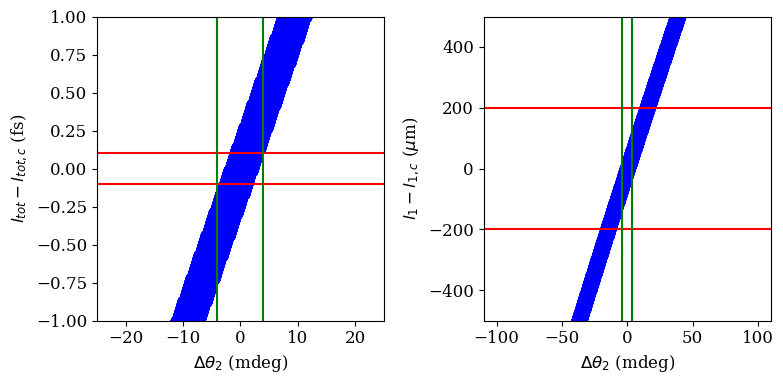

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].scatter(x=np.rad2deg(theta2_flat) * 1000 - 2000, y=(l_tot_flat - l_tot_center) / util.c, c='b')
ax[0].set_xlabel(r"$\Delta\theta_2$ (mdeg)")
ax[0].set_ylabel(r"$l_{tot} - l_{tot, c}$ (fs)")
ax[0].axhline(y=0.1, color='r')
ax[0].axhline(y=-0.1, color='r')
ax[0].axvline(x=4, color='g')
ax[0].axvline(x=-4, color='g')
ax[0].set_ylim([-1, 1])
ax[0].set_xlim([-25, 25])


ax[1].scatter(x=np.rad2deg(theta2_flat) * 1000 - 2000, y=l1_flat - l1_c, c='b')
ax[1].set_xlabel(r"$\Delta\theta_2$ (mdeg)")
ax[1].set_ylabel(r"$l_{1} - l_{1, c}$ ($\mu$m)")
ax[1].axhline(y=200, color='r')
ax[1].axhline(y=-200, color='r')
ax[1].axvline(x=4, color='g')
ax[1].axvline(x=-4, color='g')
ax[1].set_ylim([-0.5e3, 0.5e3])

plt.tight_layout()
plt.savefig("./ray_tracing_calculation.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
np.pi * 2 / (util.kev_to_wavevec_length(8.048) * np.sin(theta_3[500]) * 2) * 1000

1.1090723933402484

In [39]:
l1_c * np.tan(theta_1) / 1e3

1.840525643751688

In [41]:
(l0 - l1_c) / 1e3

26.436153550208545

In [44]:
10 / np.tan(np.deg2rad(2)) 

286.36253282915607